In [1]:
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def group_by_time_stamp(case_dict):
    to_return={}
    
    for sim,data in case_dict.items():
        
        for date,results in data.items():
            if date not in to_return:
                to_return[date]={}
            to_return[date][sim]=results
    return to_return

In [3]:
def get_all():
    to_return = {}
    for pn in range(10):
        with open('../../Downloads/pooling_four_results_7_24_pn_{}.pkl'.format(pn),'rb') as f:
            pooled = pickle.load(f)      
            #temp = group_by_time_stamp(['case_two']['regrets'])
            to_return[pn]=pooled['case_three']['regrets']
    return to_return

In [4]:
def get_regret_at_time(alls):
    to_return = {}
    
    for population in range(10):
        temp = group_by_time_stamp(alls[population])
        
        for time,v in temp.items():
            if time not in to_return:
                to_return[time]={}
            #td = {}
            for sim_id,regrets in v.items():
                new_key  = '{}-{}'.format(population,sim_id)
                to_return[time][new_key]=regrets
            #to_return[time]=td
    return to_return

In [5]:
def get_population_averages(a_dict,key):
    to_return = {}
    for k,v in a_dict.items():
        temp = {}
        for lk,vals in v.items():
            #print(lk)
            population_id = int(lk.split('-')[key])
            if population_id not in temp:
                temp[population_id]=[]
            temp[population_id].extend(vals)
        to_return[k]= {kk:np.array(vv).mean() for kk,vv in temp.items()}
    return to_return

In [6]:
def ssg(big_dict,smaller_dict):
    to_return = []
    #print(big_dict.values())
    meanc = np.array([np.array(v).mean() for v in big_dict.values()]).mean()
    for i in range(10):
       
        to_return.append(50*(smaller_dict[i]-meanc)**2)
    return sum(to_return)

In [7]:
def get_s2(big_dict):
    to_return = {}
    
    shelpers =  get_population_averages(big_dict,0)      
    for time,ld in big_dict.items():
        to_return[time]=ssg(ld,shelpers[time])
    return to_return   

In [8]:
def ssw(big_dict,smaller_dict):
    to_return = []
    for i in range(10):
        smaller_val = smaller_dict[i]
        #print(smaller_val)
        temp = [(np.array(regrets).mean()-smaller_val)**2 for k,regrets in big_dict.items() if int(k.split('-')[0])==i]
        #print(temp)
        #print(len(temp))
        to_return.extend(temp)
    return sum(to_return)

In [9]:
def get_s1(big_dict):
    to_return = {}
    
    shelpers =  get_population_averages(big_dict,0)      
    for time,ld in big_dict.items():
        to_return[time]=ssw(ld,shelpers[time])
    return to_return      

In [10]:
def get_sst(big_dict):
    to_return = {}
    
    for time,data in big_dict.items():
        #means = [np.array(v).mean() for v in big_dict.values()]
        
        all_values = [np.array(v).mean() for v in data.values()]
        #print(len(all_values))
        meanc = np.array(all_values).mean()
        temp = [(i-meanc)**2 for i in all_values]
        to_return[time]=sum(temp)
    return to_return

In [11]:
p = get_all()

In [12]:
nd = get_regret_at_time(p)

In [13]:
t = get_population_averages(nd,0)

In [15]:
psmall = t[pd.Timestamp('2015-07-27 10:00:00')]

pbig = nd[pd.Timestamp('2015-07-27 10:00:00')]


In [46]:
tr =group_by_time_stamp(p[0])

In [16]:
#within
s1 = get_s1(nd)


In [17]:
#between
s2 = get_s2(nd)

In [18]:
st = get_sst(nd)

In [19]:
checks = [(s1[t]+s2[t])-st[t] for t in st.keys()]

In [22]:
def get_weekly_averages(points):
    to_return = []
    for i in range(0,len(points),35):
        temp = points[i:i+35]
        to_return.append(np.array(temp).mean())
    return to_return

In [23]:
ts2 = get_weekly_averages(to_plot)

In [20]:
to_plot = [s2[t]/st[t] for t in sorted(st.keys())]

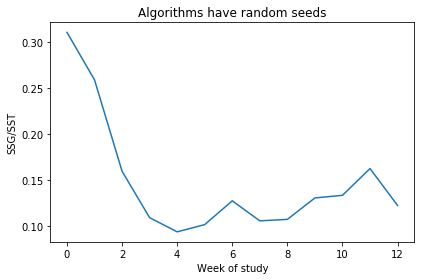

In [25]:
plt.plot(ts2)
plt.ylabel('SSG/SST')
plt.xlabel('Week of study')
plt.title('Algorithms have random seeds')
plt.tight_layout()
plt.savefig('between study variance (SSG) over total measure of variability (SST) algorithm random seeds')


In [26]:
np.diag([4,3,2,1])

array([[4, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 1]])